In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### functions

In [4]:
def remove_high_miss_feature(input_df, max_of_miss):
    
    variable_name = input_df.isnull().sum().index
    count_of_null = input_df.isnull().sum().values

    count_of_null_df = pd.DataFrame({'variable' : variable_name,
                                      'count' : count_of_null})

    low_null_feature = count_of_null_df[count_of_null_df['count'] < max_of_miss ]['variable'].values
    input_df = input_df[low_null_feature]
    return input_df
    

In [812]:
def count_of_missing_value(input_df, miss_value_df):
    number_of_miss_df = pd.DataFrame(columns=['Variable' , 'Miss'])
    for i in range(len(miss_value_df)):

        variable = miss_value_df.iloc[i][0]
        miss = int(miss_value_df.iloc[i][1])
        count = len(input_df[input_df[variable] == miss])
        dic = {'Variable': variable, 'Miss' : count}
        number_of_miss_df = number_of_miss_df.append(dic, ignore_index = True)

    return number_of_miss_df.sort_values(by= 'Miss', ascending=False)
    

In [817]:
def replace_None(x, missing_value):
    if(x == missing_value):
        return None
    else:
        return x
    
def remove_missing_value(input_df, miss_value_df):
    missing_value = 9
    variable = ''
    
    for row_of_df in miss_value_df.values:

        variable = row_of_df[0]
        missing_value = float(row_of_df[1])
        
        input_df[variable] = input_df[variable].apply(lambda x: replace_None(x, missing_value))
        (input_df[variable])
        
    return input_df

In [818]:
def count_of_None_value(input_df):
    
    variable_name = input_df.isnull().sum().index
    count_of_null = input_df.isnull().sum().values

    count_of_null_df = pd.DataFrame({'variable' : variable_name,
                                      'count' : count_of_null})
    return count_of_null_df.sort_values(by = 'count', ascending=False)

In [3]:
def replaceing_None_value(input_df, level_df):
    for i in level_df.values:
        variable = i[0]
        level = i[2]
        
        if(level == 'Nominal'):
            input_df[variable].fillna(float(input_df[variable].mode()), inplace=True)
        
        else:
            input_df[variable].fillna(float(input_df[variable].median()), inplace=True)
    
    return input_df

In [832]:
def z_score(input_df):
    # copy the data
    df_z_scaled = input_df

    # apply normalization techniques
    for column in df_z_scaled.columns:
        df_z_scaled[column] = (df_z_scaled[column] -
                               df_z_scaled[column].mean()) / df_z_scaled[column].std()    

    # view normalized data   
    return df_z_scaled

### Reading dataset

In [704]:
df = pd.read_excel('TIMSS2019.xlsx')

In [822]:
timss_df = df.copy()
# timss_df

### Reading and aggregation notebooks

In [823]:
#read all feature from codebook
feature= [] 
feature.append(pd.read_excel('T2019_G8_Codebook.xlsx', sheet_name='BSGM7'))
feature.append(pd.read_excel('T2019_G8_Codebook.xlsx', sheet_name='BCGM7'))
feature.append(pd.read_excel('T2019_G8_Codebook.xlsx', sheet_name='BTMM7'))

codebook = pd.concat([feature[0], feature[1], feature[2]], axis=0, ignore_index = True)
codebook_feature = codebook['Variable'].value_counts().index.tolist()
timss_feature = list(timss_df.columns)

###  Drop duplicate features

In [824]:
timss_df_1 = timss_df.copy()
codebook = codebook[codebook['Variable'].isin(list(timss_feature)) ].drop_duplicates()
codebook_feature = codebook['Variable'].value_counts().index.tolist()
timss_df_1 = timss_df_1[codebook_feature]
# timss_df_1

###  Delete ID from features

In [825]:
timss_df_2 = timss_df_1.copy()
codebook = codebook[codebook['Variable Class'] != 'ID' ]
features_variable = list(codebook['Variable'].values)
timss_df_2 = timss_df_2[features_variable]
# timss_df_2

### Remove features that empty values are more than half the number of rows

In [826]:
timss_df_3 = timss_df_2.copy()
timss_df_3 = remove_high_miss_feature(timss_df_3, 3000)
# timss_df_3

### Find missing value for each feature

In [827]:
miss_value_df = codebook[['Variable']].copy()
miss_value_df['Miss'] = codebook['Missing Scheme Detailed: SPSS'].apply(lambda x: x.split(':')[0])
miss_value_df['Level'] = codebook['Level']
# miss_value_df

### Remove missing values

In [820]:
timss_df_4 = timss_df_3.copy()
timss_df_4_col = pd.DataFrame(list(timss_df_4.columns.values), columns=['Variable'])
miss_value_df = pd.merge(left = timss_df_4_col, right = miss_value_df, how = 'inner')
timss_df_4 = remove_missing_value(timss_df_4, miss_value_df)


### Drop features that has high miss values

In [829]:
timss_df_5 = timss_df_4.copy()
timss_df_5 = remove_high_miss_feature(timss_df_5, 400)
# count_of_None_value(timss_df_5)

###  Replace finalscore with numeric values

In [789]:
timss_df_6 = timss_df_5.copy()
col = list(timss_df_6.columns)
timss_df_6[['finalscore','finalscorealgebra','finalscoredat', 'finalscoregeo', 'finalscorenum']] = timss_df[['finalscore','finalscorealgebra','finalscoredat', 'finalscoregeo', 'finalscorenum']]

timss_df_6 = timss_df_6.replace(to_replace =["A", "B", "C", "D", "E"], 
                            value =[5,4,3,2,1])
# timss_df_6

### Replace null values with mode and median

In [830]:
timss_df_7 = timss_df_6.copy()

timss_df_7_col = pd.DataFrame(list(timss_df_7.columns.values), columns=['Variable'])
miss_value_df_1 = pd.merge(left = timss_df_7_col, right = miss_value_df, how = 'inner')

timss_df_7 = replaceing_None_value(timss_df_7, miss_value_df_1)
# count_of_None_value(timss_df_7)

###  Remove rows that hasn't finalscore

In [831]:
timss_df_8 = timss_df_7.copy()

timss_df_8 = timss_df_8.dropna()
# count_of_None_value(timss_df_8)
# timss_df_8
# final_col

###  Normalization by z-score

In [833]:
timss_df_9 = timss_df_8.copy()
timss_df_9 = z_score(timss_df_9)
# timss_df_9

### Calculate the most important contextual factors affecting student performance

In [834]:
timss_df_9_corr = timss_df_9.corr()
factors = timss_df_9_corr['finalscore'].sort_values(ascending=False)

In [835]:
factors_df = pd.DataFrame(factors).reset_index()
# factors_df

In [836]:
positive = factors_df.head(15).tail(10)
negative = factors_df.tail(10)

high_factors = pd.concat([positive, negative], axis=0, ignore_index = True)
high_factors.columns = ['variable', 'effect']
# high_factors

### Comparison of the most important contextual factors affecting students' performance

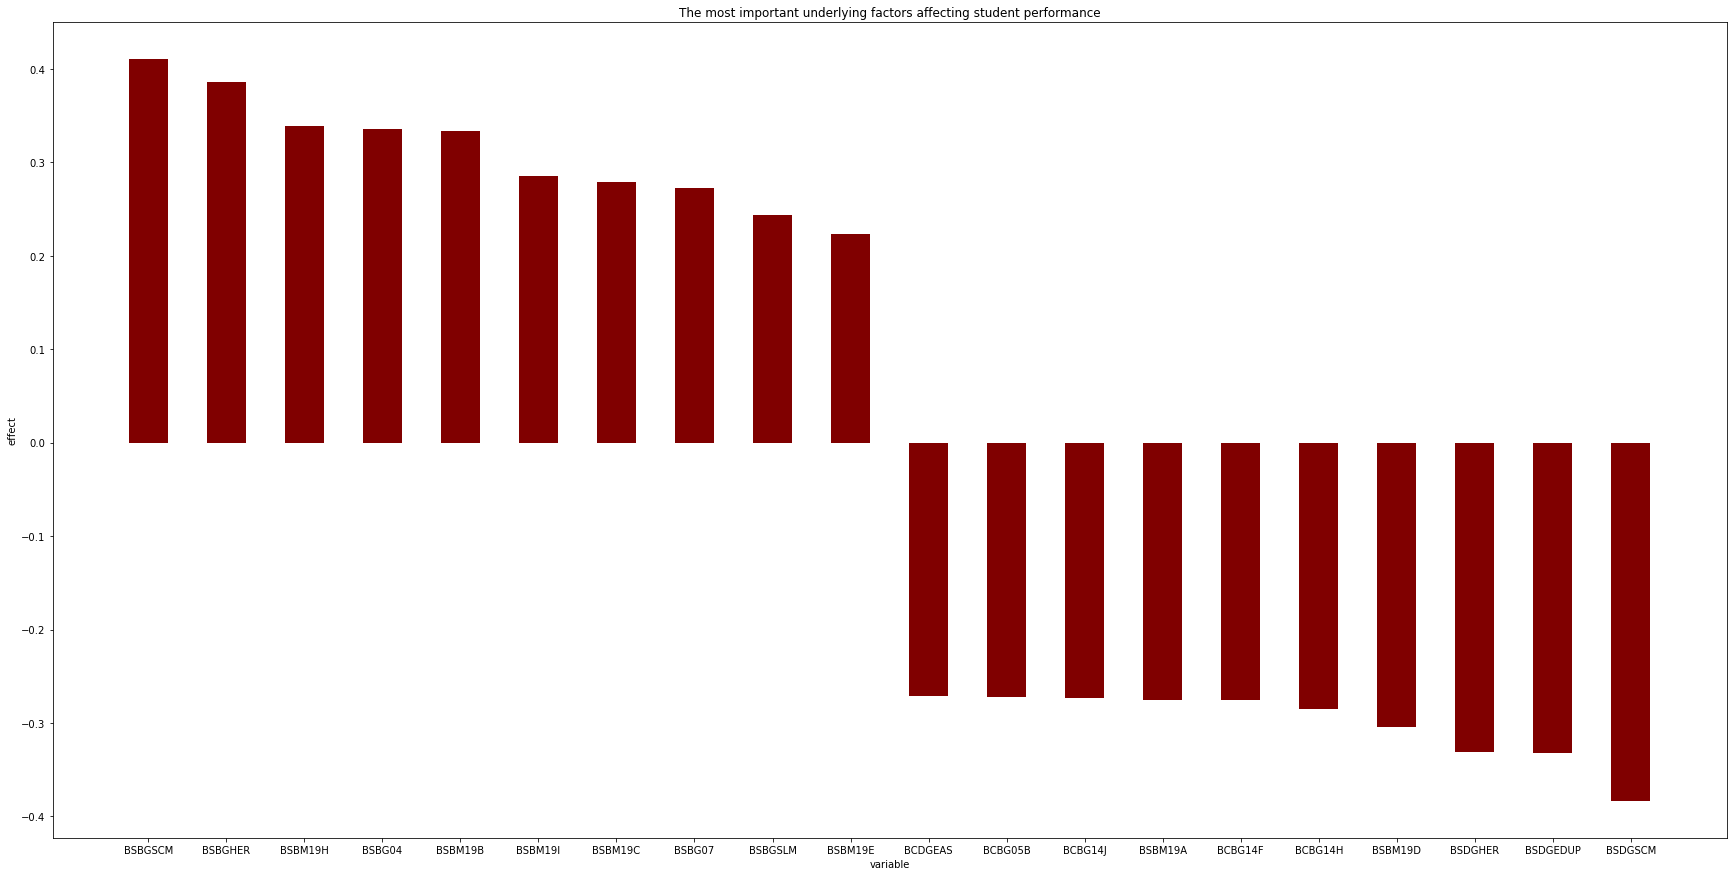

In [798]:
courses = list(high_factors['variable'].values)
values = list(high_factors['effect'].values)
  
fig = plt.figure(figsize = (30, 15))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.5)
 
plt.xlabel("variable")
plt.ylabel("effect")
plt.title("The most important underlying factors affecting student performance")
plt.show()

### Calculation of factors affecting the performance of male and female students

In [799]:
timss_boy_df = timss_df_9.copy()
timss_girl_df = timss_df_9.copy()

timss_boy_df['BSBG01'] = timss_df['BSBG01'] 
timss_girl_df['BSBG01'] = timss_df['BSBG01'] 

timss_boy_df = timss_boy_df[timss_boy_df['BSBG01'] == 2 ]
timss_girl_df = timss_girl_df[timss_girl_df['BSBG01'] == 1 ]

In [800]:
timss_boy_df_corr = timss_boy_df.corr()
boy_factors = timss_boy_df_corr['finalscore'].sort_values(ascending=False)

In [801]:
timss_girl_df_corr = timss_girl_df.corr()
girl_factors = timss_girl_df_corr['finalscore'].sort_values(ascending=False)

In [802]:
boy_factors_df = pd.DataFrame(boy_factors).reset_index()
boy_factors_df.columns = ['variable', 'effect']

girl_factors_df = pd.DataFrame(girl_factors).reset_index()
girl_factors_df.columns = ['variable', 'effect']

boy_girl_factors_df = pd.merge(left = girl_factors_df, right = boy_factors_df, how = 'inner', on = 'variable')
boy_girl_factors_df.columns = ['variable', 'girl effect', 'boy effect']
# boy_girl_factors_df = boy_girl_factors_df.set_index('variable')
# boy_girl_factors_df

In [803]:
positive_factors = boy_girl_factors_df.head(15).tail(10)
negative_factors = boy_girl_factors_df.tail(12).head(10)


boy_girl_high_factors_df = pd.concat([positive_factors, negative_factors], axis=0, ignore_index = True)
boy_girl_high_factors_df = boy_girl_high_factors_df.set_index('variable')
# boy_girl_high_factors_df

### Comparison of the effect of contextual factors on male and female students

<AxesSubplot:xlabel='variable'>

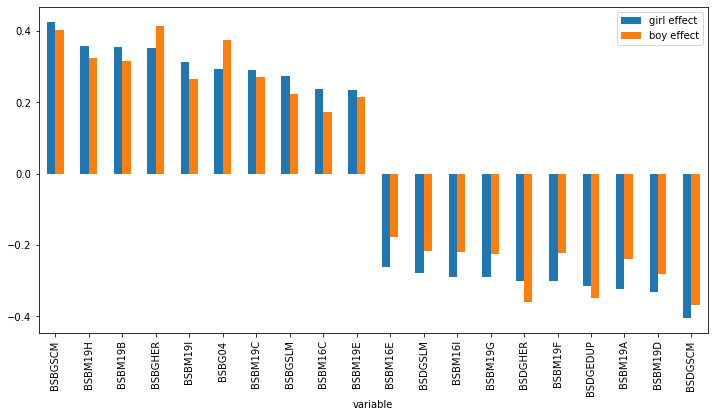

In [804]:
boy_girl_high_factors_df.plot.bar(figsize=(12,6))

### Calculating the impact of contextual factors on different content areas

In [805]:
content_factors = {}
for i in ['finalscorealgebra','finalscoredat', 'finalscoregeo', 'finalscorenum']:
    cotent_corr = timss_df_9_corr[i].sort_values(ascending=False)
    cotent_corr = cotent_corr.reset_index()
    positive_factors = cotent_corr.head(14).tail(10)
    nagative_factors = cotent_corr.tail(10)
    content_factors[i] = pd.concat([positive_factors, nagative_factors], axis=0, ignore_index = True)



In [806]:
temp = pd.merge(left = content_factors['finalscorealgebra'] , right = content_factors['finalscoredat'] , how = 'inner', on = 'index')
temp = pd.merge(left = temp , right = content_factors['finalscoregeo'] , how = 'inner', on = 'index')
temp = pd.merge(left = temp , right = content_factors['finalscorenum'] , how = 'inner', on = 'index')
temp = temp.set_index('index')
# temp

### Comparison of the impact of contextual factors on different content areas

<AxesSubplot:xlabel='index'>

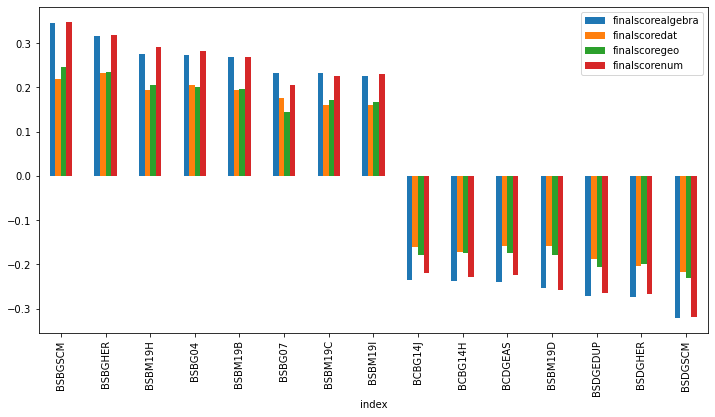

In [807]:
temp.plot.bar(figsize=(12,6))